In [2]:
import xlrd
def get_data(filename,sheetnum):	
    data = xlrd.open_workbook(filename)
    table = data.sheets()[sheetnum]
    nor = table.nrows
    nol = table.ncols
    dict = {'3':[],'4':[]}
    branch3 = {'1':[],'2':[],'3':[],'4':[],'5':[],'6':[],'7':[]}
    branch4 = {'1':[],'2':[],'3':[],'4':[],'5':[],'6':[],'7':[]}
    for i in range(1,nor):
        if str(int(table.cell_value(i,1))) == '3':
            #print(table.cell_value(i,2))
            branch3[str(int(table.cell_value(i,2)))].append(table.cell_value(i,5))
        if str(int(table.cell_value(i,1))) == '4':
            branch4[str(int(table.cell_value(i,2)))].append(table.cell_value(i,5))
    dict['3'].append(branch3)
    dict['4'].append(branch4)
    return dict
data = get_data('数据采集2021-12-13.xls',0)


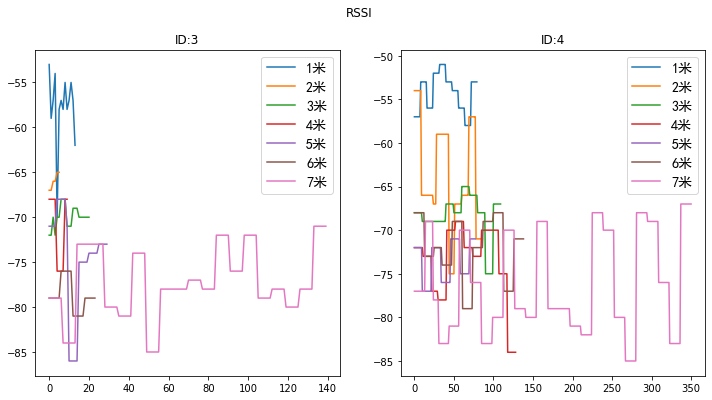

In [3]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

fontP = font_manager.FontProperties()
fontP.set_family('SimHei')
fontP.set_size(14)

fig = plt.figure(figsize=(12,6))
fig.suptitle('RSSI')
plt.subplot(1,2,1)
for i in range(7):
    plt.plot(data['3'][0][str(i+1)])
plt.title('ID:3')
plt.legend(['1米','2米','3米','4米','5米','6米','7米'], prop=fontP)
plt.subplot(1,2,2)
plt.title('ID:4')
for i in range(7):
    plt.plot(data['4'][0][str(i+1)])
plt.legend(['1米','2米','3米','4米','5米','6米','7米'], prop=fontP)
plt.show()

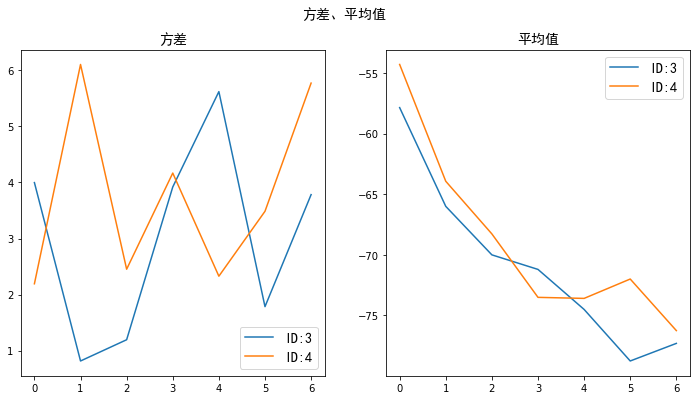

In [4]:
import numpy as np
std3 = []
ave3 = []
std4 = []
ave4 = []
for i in range(7):
    std3.append(np.std(np.array(data['3'][0][str(i+1)])))
    ave3.append(np.mean(np.array(data['3'][0][str(i+1)])))
for i in range(7):
    std4.append(np.std(np.array(data['4'][0][str(i+1)])))
    ave4.append(np.mean(np.array(data['4'][0][str(i+1)])))
fig = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(std3)
plt.plot(std4)
plt.title('方差',fontproperties=fontP)
plt.legend(['ID:3','ID:4'], prop=fontP)
plt.subplot(1,2,2)
plt.plot(ave3)
plt.plot(ave4)
plt.title('平均值',fontproperties=fontP)
plt.legend(['ID:3','ID:4'], prop=fontP)
fig.suptitle('方差、平均值',fontproperties=fontP)
plt.show()

# 卡尔曼滤波后

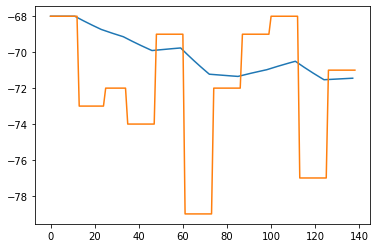

In [5]:
def kalmanF(data,q=3,r=300):
    evalkk=0#当前卡尔曼估计值
    evalkk1=0#当前预测值
    evalk1k1=0#上一次卡尔曼估计值
    Pkk=1
    Pkk1=1
    Pk1k1=1
    Q = q
    R = r
    kalman_T = []
    evalkk = data[0]
    for i in range(1,len(data)):
        evalkk1 = evalkk #上一次的卡尔曼估计值为预测值
        Pkk1 = Pk1k1 + Q #此次协方差预测值
        Kk = Pkk1/(Pkk1+R)#最优卡尔曼估计
        evalkk = evalkk1 + Kk*(data[i] - evalkk1)#当前卡尔曼估计值
        Pkk1 = Pkk1 - Kk*Pkk1#当前卡尔曼协方差估计值
        kalman_T.append(evalkk)
    return kalman_T
test = kalmanF(data['4'][0][str(6)])
plt.plot(test)
plt.plot(data['4'][0][str(6)])
plt.show()

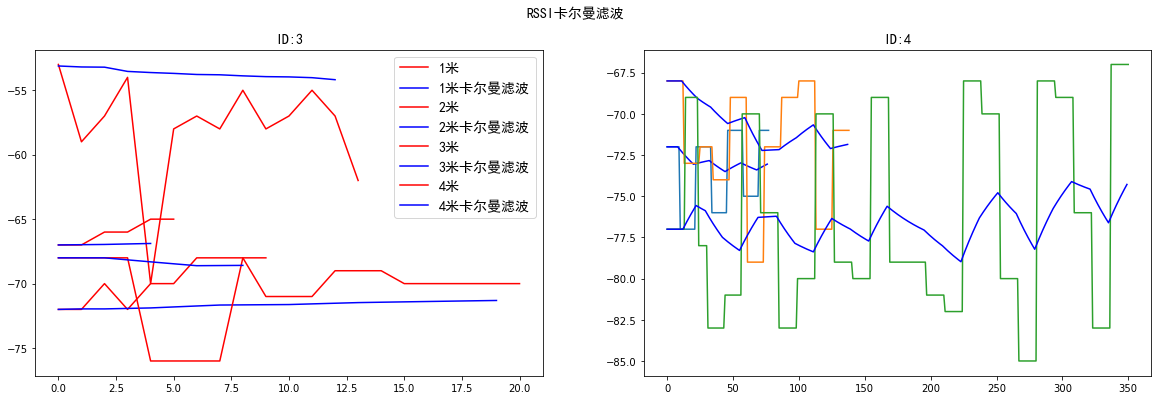

In [16]:
fig = plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('ID:3',fontproperties=fontP)
for i in range(4):
    plt.plot(data['3'][0][str(i+1)],'r-')
    plt.plot(kalmanF(data['3'][0][str(i+1)],q=1,r=100),'b-')
plt.legend(['1米','1米卡尔曼滤波','2米','2米卡尔曼滤波','3米','3米卡尔曼滤波','4米','4米卡尔曼滤波'\
            ,'5米','5米卡尔曼滤波','6米','6米卡尔曼滤波','7米','7米卡尔曼滤波'], prop=fontP)
plt.subplot(1,2,2)
plt.title('ID:4',fontproperties=fontP)
for i in range(4,7):
    plt.plot(data['4'][0][str(i+1)],'-')
    plt.plot(kalmanF(data['4'][0][str(i+1)],q=1,r=100),'b-')
fig.suptitle('RSSI卡尔曼滤波',fontproperties=fontP)
plt.show()

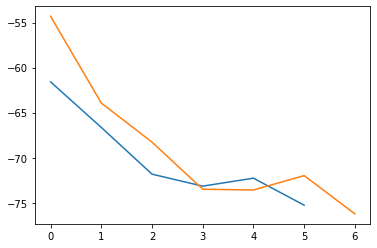

In [29]:
k_ave = kalmanF(ave4,q=30,r=10)
plt.plot(k_ave)
plt.plot(ave4)
plt.show()